In [1]:
from tracemalloc import start
import pandas_datareader.data as web

class Data:
    def __init__(self, company,start,end):
        self.company = company
        self.start_date = start
        self.end_date = end

    def get_data(self):
        return web.DataReader(self.company,'yahoo' ,self.start_date, self.end_date)

    def tranform_data(self,data):
        data.reset_index(inplace=True)
        data.set_index('Date',inplace=True)
        return data

In [2]:
import pandas as pd

In [3]:
company = 'AAPL'
start_date = '2015-01-01'
end_date = '2020-01-01'
data = Data(company,start_date,end_date)
df= data.get_data()
df = data.tranform_data(df)
print(df.head())

                 High        Low       Open      Close       Volume  Adj Close
Date                                                                          
2015-01-02  27.860001  26.837500  27.847500  27.332500  212818400.0  24.745996
2015-01-05  27.162500  26.352501  27.072500  26.562500  257142000.0  24.048862
2015-01-06  26.857500  26.157499  26.635000  26.565001  263188400.0  24.051126
2015-01-07  27.049999  26.674999  26.799999  26.937500  160423600.0  24.388378
2015-01-08  28.037500  27.174999  27.307501  27.972500  237458000.0  25.325434


In [4]:
from statsmodels.tsa.arima.model import ARIMA,ARIMAResults


In [6]:
def arima_model(df,p,d,q,P=None,D=None,Q=None):
    if(P is None):
        model = ARIMA(df,order=(p,d,q))
        model_fit =model.fit(df)
        sumary = model_fit.summary
    else:
        model = ARIMA(df,order=(p,d,q), seasonal_order=(P,D,Q,7))
        model_fit =model.fit(df)
        sumary = model_fit.summary

    pred_data_test = model_fit.predict(start=0,end=len(df))
    print(pred_data_test)
    prediction = pd.DataFrame({'y-pred':pred_data_test}, index=df.index)
    prediction = prediction.join(df)

    return prediction,sumary

In [17]:
len(df[:5]['Adj Close'])

5

In [21]:
mod = ARIMA(df[:5]['Adj Close'], order=(0, 0, 2))
res = mod.fit()
print(res.summary())

C:\Users\balug\AppData\Local\Programs\Python\Python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  % freq, ValueWarning)
C:\Users\balug\AppData\Local\Programs\Python\Python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  % freq, ValueWarning)
C:\Users\balug\AppData\Local\Programs\Python\Python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  % freq, ValueWarning)
C:\Users\balug\AppData\Local\Programs\Python\Python37\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:868: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  ' zeros.' % warning_description)


                               SARIMAX Results                                
Dep. Variable:              Adj Close   No. Observations:                    5
Model:                 ARIMA(0, 0, 2)   Log Likelihood                  -2.718
Date:                Wed, 02 Feb 2022   AIC                             13.437
Time:                        02:24:32   BIC                             11.875
Sample:                    01-02-2015   HQIC                             9.244
                         - 01-08-2015                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         24.4786      0.257     95.095      0.000      23.974      24.983
ma.L1         -0.4168   4894.627  -8.51e-05      1.000   -9593.709    9592.875
ma.L2         -0.5831   2854.803     -0.000      1.0

In [22]:
pred_data_test = res.predict(start=0,end=5)
pred_data_test

2015-01-02    24.478558
2015-01-05    24.447857
2015-01-06    24.439834
2015-01-07    24.717538
2015-01-08    24.739826
2015-01-09    24.476746
Freq: B, Name: predicted_mean, dtype: float64

In [23]:
a,b = arima_model(df[:50]['Adj Close'],1, 1, 1)
a

C:\Users\balug\AppData\Local\Programs\Python\Python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:595: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\balug\AppData\Local\Programs\Python\Python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:595: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\balug\AppData\Local\Programs\Python\Python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:595: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\balug\AppData\Local\Programs\Python\Python37\lib\site-packages\statsmodels\tsa\statespac

0     0.0
1     NaN
2     NaN
3     NaN
4     NaN
5     NaN
6     NaN
7     NaN
8     NaN
9     NaN
10    NaN
11    NaN
12    NaN
13    NaN
14    NaN
15    NaN
16    NaN
17    NaN
18    NaN
19    NaN
20    NaN
21    NaN
22    NaN
23    NaN
24    NaN
25    NaN
26    NaN
27    NaN
28    NaN
29    NaN
30    NaN
31    NaN
32    NaN
33    NaN
34    NaN
35    NaN
36    NaN
37    NaN
38    NaN
39    NaN
40    NaN
41    NaN
42    NaN
43    NaN
44    NaN
45    NaN
46    NaN
47    NaN
48    NaN
49    NaN
50    NaN
Name: predicted_mean, dtype: float64


,y-pred,Adj Close
Date,,
2015-01-02,NaN,24.745996
2015-01-05,NaN,24.048862
2015-01-06,NaN,24.051126
2015-01-07,NaN,24.388378
2015-01-08,NaN,25.325434
2015-01-09,NaN,25.352596
2015-01-12,NaN,24.727890
2015-01-13,NaN,24.947439
2015-01-14,NaN,24.852379


In [106]:
print(b)

               y-pred  Adj Close
Date                            
2015-01-02  24.745995  24.745995
2015-01-05        NaN  24.048862
2015-01-06        NaN  24.051123
2015-01-07        NaN  24.388378
2015-01-08        NaN  25.325432
2015-01-09        NaN  25.352594
2015-01-12        NaN  24.727886
2015-01-13        NaN  24.947445
2015-01-14        NaN  24.852377
2015-01-15        NaN  24.177876


<AxesSubplot:xlabel='Date'>

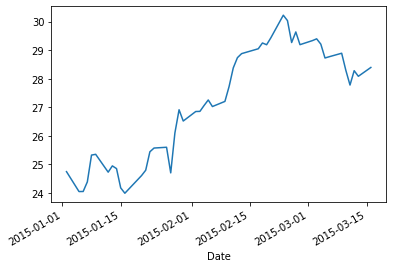

In [66]:
df[:50]['Adj Close'].plot()

In [21]:
from matplotlib import pyplot as plt

C:\Users\balug\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:2: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  


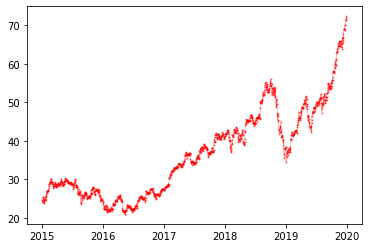

In [32]:
plt.plot_date(df.index,df['Adj Close'],linestyle='solid',marker='o',color='red',label='Adj Close',linewidth=0.5
,markersize=1,alpha=0.5,)

In [42]:
from statsmodels.tsa.stattools import adfuller

def adfuller_test(df):
    result = adfuller(df.dropna())
    print(result[1])
    if(result[1] > 0.05):
        return False
    else:
        return True

def DataDiff(df,diff_number):
    if(adfuller_test(df)==True):
            return df
    else:
        if(diff_number !=0):
            df = df.diff()
            return DataDiff(df,diff_number-1)
        else:
            return 'Daha Büyük Bir Sayı Giriniz'


In [43]:
adfuller_test(df['Adj Close'])

0.9951874873667796


False

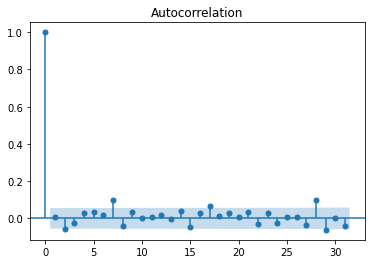

In [48]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(df['Adj Close'].diff().dropna());

<AxesSubplot:xlabel='Date'>

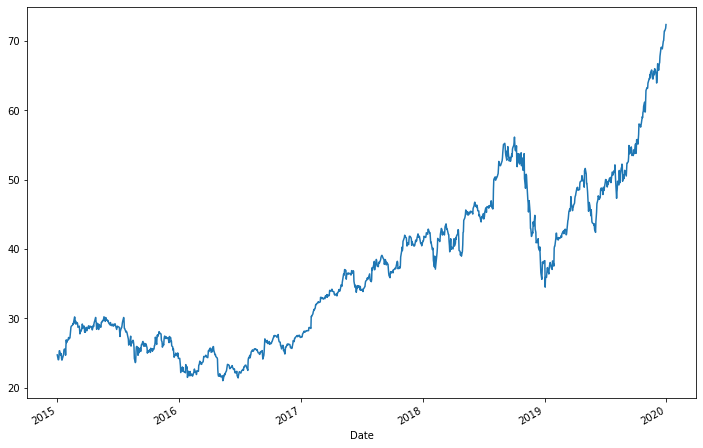

In [57]:
df['Adj Close'].plot(figsize=(12,8))

<AxesSubplot:xlabel='Date'>

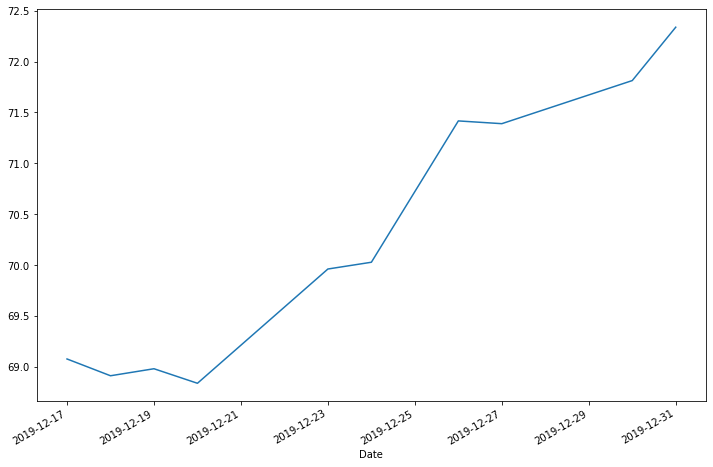

In [64]:
df['Adj Close'][-10:].plot(figsize=(12,8))

In [ ]:
diff = df['Adj Close'].diff().dropna()

In [79]:
import pmdarima as pm

model = pm.auto_arima(df['Adj Close'], 
            test='adf',       # use adftest to find optimal 'd'
            m=7,              # frequency of series
            seasonal=True,   #  Seasonality status
            trace=True,
            error_action='ignore',  
            suppress_warnings=True, 
            stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[7] intercept   : AIC=2251.941, Time=2.06 sec
 ARIMA(0,1,0)(0,0,0)[7] intercept   : AIC=2267.390, Time=0.10 sec
 ARIMA(1,1,0)(1,0,0)[7] intercept   : AIC=2258.552, Time=0.29 sec
 ARIMA(0,1,1)(0,0,1)[7] intercept   : AIC=2259.311, Time=0.26 sec
 ARIMA(0,1,0)(0,0,0)[7]             : AIC=2270.463, Time=0.04 sec
 ARIMA(2,1,2)(0,0,1)[7] intercept   : AIC=2255.842, Time=1.68 sec
 ARIMA(2,1,2)(1,0,0)[7] intercept   : AIC=2254.644, Time=0.95 sec
 ARIMA(2,1,2)(2,0,1)[7] intercept   : AIC=2252.873, Time=5.05 sec
 ARIMA(2,1,2)(1,0,2)[7] intercept   : AIC=2252.804, Time=6.11 sec
 ARIMA(2,1,2)(0,0,0)[7] intercept   : AIC=2268.503, Time=0.91 sec
 ARIMA(2,1,2)(0,0,2)[7] intercept   : AIC=2256.262, Time=2.79 sec
 ARIMA(2,1,2)(2,0,0)[7] intercept   : AIC=2255.560, Time=2.56 sec
 ARIMA(2,1,2)(2,0,2)[7] intercept   : AIC=2255.726, Time=5.85 sec
 ARIMA(1,1,2)(1,0,1)[7] intercept   : AIC=2252.795, Time=2.27 sec
 ARIMA(2,1,1)(1,0,1)[7] intercept

In [86]:
pm.arima

AttributeError: module 'pmdarima' has no attribute 'plot_predict_ui'

array([24.74600029, 24.04885864, 24.05112457, ..., 57.56208801,
       57.7855835 , 58.06311798])

In [138]:
arima = pm.ARIMA(order=(1, 1, 0), seasonal_order=(2, 2, 2, 7))

In [139]:
arima.fit(df['Adj Close'].values[:-50])

C:\Users\balug\AppData\Local\Programs\Python\Python37\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
C:\Users\balug\AppData\Local\Programs\Python\Python37\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


ARIMA(order=(1, 1, 0), seasonal_order=(2, 2, 2, 7))

In [1]:
df['Adj Close'].values

NameError: name 'df' is not defined

In [140]:
import pandas as pd

pred_data_test = arima.predict(n_periods=len(df['Adj Close'].values[:-50]))
pred_df = pd.DataFrame(pred_data_test,index=df['Adj Close'][:-50].index,columns=['Prediction'])


In [141]:
pred_df

,Prediction
Date,
2015-01-02,58.462847
2015-01-05,58.797896
2015-01-06,58.360495
2015-01-07,58.884409
2015-01-08,58.813165
...,...
2019-10-14,-1725.751913
2019-10-15,-1726.225809
2019-10-16,-1732.283852


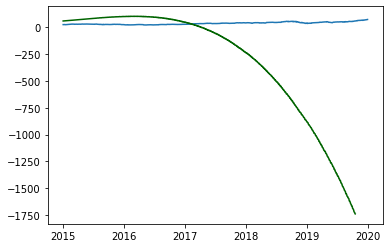

In [142]:
from matplotlib import pyplot as plt

plt.plot(df['Adj Close'])
plt.plot(pred_df, color='darkgreen');

In [144]:
import plotly.express as px

fig = px.line(df, x=df.index, y="Adj Close")
fig.show()